Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

*(I followed along and live coded with the teacher, here is the link to my work:
https://colab.research.google.com/drive/1jZz_MIVl-gDNIyAWVaR7P_TyZg6T5XZN)* 

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here

##Imitate a real-world example (from the lecture notes)

In [0]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image

In [3]:
url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url = url, width=400)

display(example)

In [4]:
# what styles are availible in matplotlib?
print(plt.style.available[:5])
plt.style.use('fivethirtyeight')

['seaborn-pastel', 'dark_background', 'seaborn-dark-palette', 'seaborn-deep', 'ggplot']


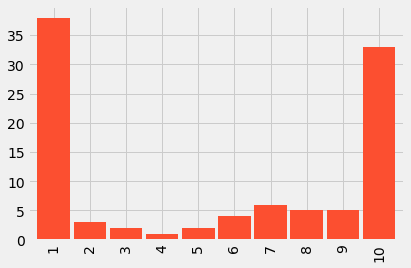

In [7]:
# Create data to replicate the blog figure
fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33],
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

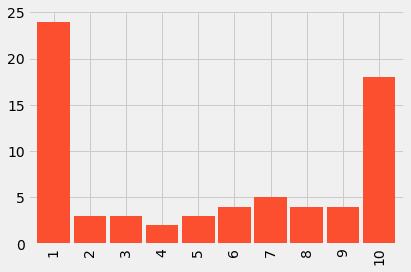

In [10]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

###Annotate with text

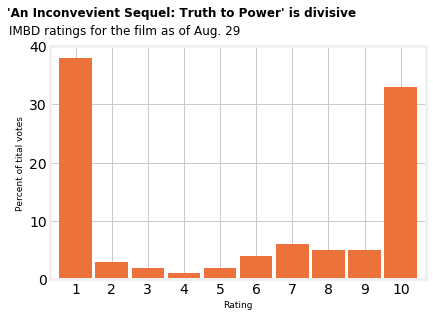

In [20]:
fig, ax = plt.subplots()
fig.patch.set(facecolor="white")

# set the bars
fake.plot.bar(width=0.9, color='#ED713A')

ax.set(facecolor="white")

#set title and subtitle
ax.set_title("'An Inconvevient Sequel: Truth to Power' is divisive",
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')
ax.text(s="IMBD ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);

#set the x and y labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of tital votes", fontsize=9)

# Fix the x and y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

In [21]:
display(example)

##Reproduce another example

In [26]:
url2 = 'https://fivethirtyeight.com/wp-content/uploads/2016/05/bialik-fridaythe13th-2.png?w=575'
example2 = Image(url=url2, width=575)

display(example2)

In [0]:
# use the 538 style
plt.style.use('fivethirtyeight')

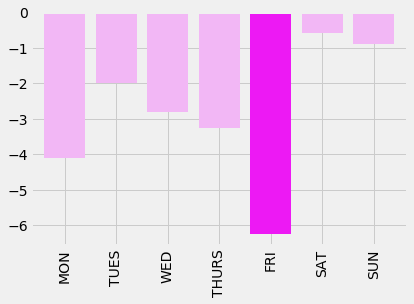

In [142]:
# Create fake data to get the picture to match
fake = pd.Series([-4.1, -2, -2.8, -3.25, -6.25, -.6, -.9],
                 index=['MON', 'TUES', 'WED', 'THURS', 'FRI', 'SAT', 'SUN'])
plt_colors = ['#F2B7F5','#F2B7F5','#F2B7F5','#F2B7F5','#ED19F4',
              '#F2B7F5','#F2B7F5',]

fake.plot.bar(color=plt_colors, width=.8);


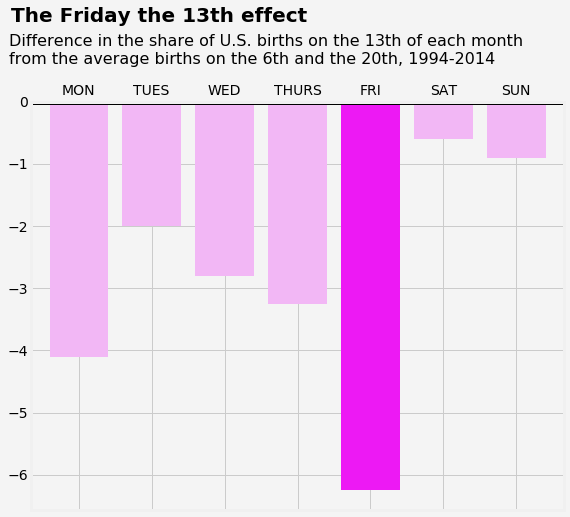

In [180]:
# Annotate with text
fig, ax = plt.subplots(figsize=(8.5,7))
fig.patch.set(facecolor='#F4F4F4')

fake.plot.bar(width=0.8, color=plt_colors)

ax.set(facecolor='#F4F4F4')

# Set the title and subtitle
ax.set_title("The Friday the 13th effect",
             fontsize=20,
             x=.24,
             y=1.18,
             fontweight='bold')
ax.text(s="Difference in the share of U.S. births on the 13th of each month" ,
        fontsize=16, x=-.95, y=.9)
ax.text(s='from the average births on the 6th and the 20th, 1994-2014',
        fontsize=16, x=-.95, y=.6)
# put x labels on top
ax.xaxis.tick_top()

ax.axhline(y=0, linewidth=5, color='k');




In [144]:
display(example2)

#Make more Charts

###Voronoi Chart

In [0]:
# set some random points
points = np.random.rand(20,2)

In [0]:
#import and set
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)

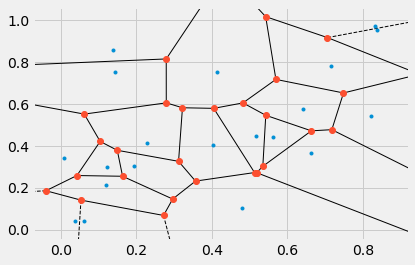

In [199]:
#basic diagram
fig = voronoi_plot_2d(vor)

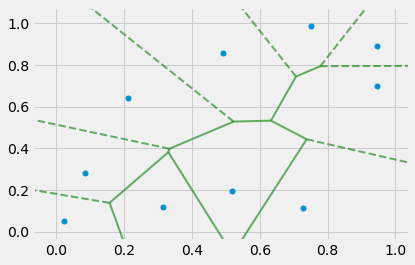

In [195]:
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='green',
                      line_width=2, line_alpha=.6, point_size=10)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here